<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> Cats or Dogs - using CNN with Transfer Learning (VGG16) 📷 🚀 </h1> </div>
The Dogs & Cats is a foundational problem for a basic CNN(convolutional neural network) model which involves classifying images as a dog or a cat.The dataset can be used for learning how to develop,evaluate and use convolutional deep learning neural networks for classification of images. This includes how to develop a robust test harness for estimating the performance of the model, exploring improvements for the model by changing the paramters of the model, saving and loading the model to make predicitions on new data.

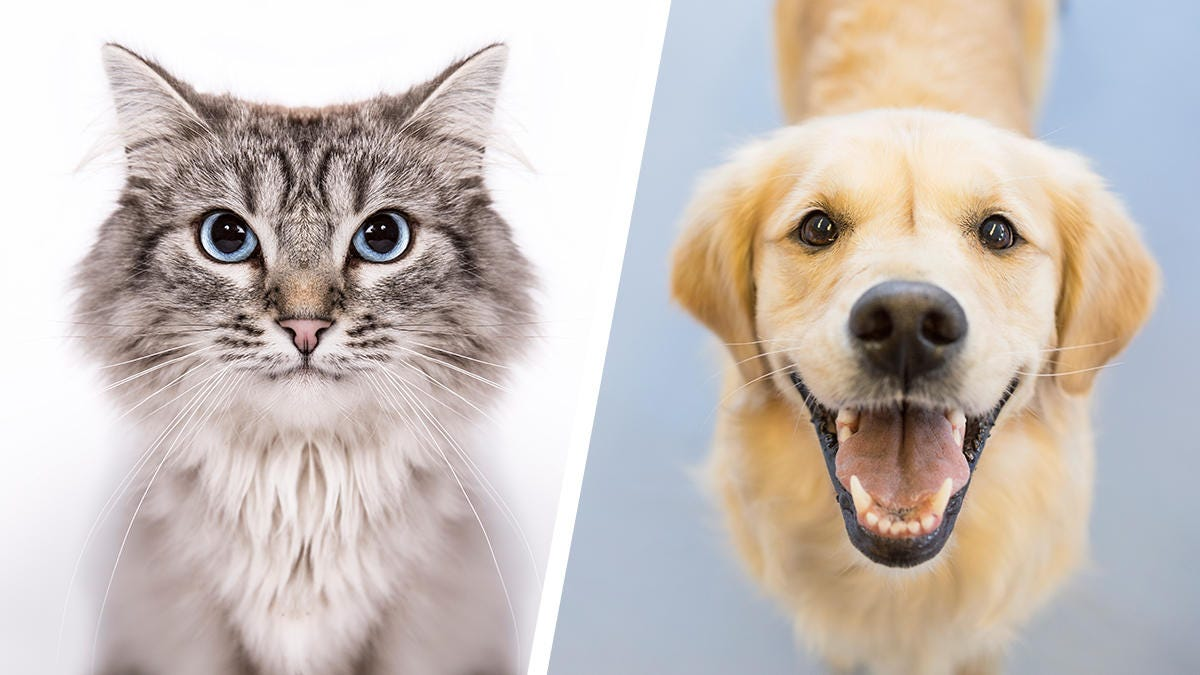

<div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:black">Table of Content </h2> </div>

1. [Introduction 💥](#1)
1. [Loading Libraries📖](#2)
1. [Data Extraction 📁](#3)
1. [Data Exploration📊](#4)
1. [Data Preparation 🛠️](#5)
    1. [Train Test Split](#6)
    1. [Image Median](#7)
    1. [Image Data Generator](#8)
1. [Deep learning Model ⚙️](#9)
    1. [Pre-trained Model](#10)
    1. [Final Model](#11)
       1. [Compile](#12)
       1. [Callbacks](#13)
       1. [Fit Model](#14)
       1. [Plot Result](#15)
       1. [Evaluvation](#16)
1. [Prediction](#17)
    1. [Visualize Classified Images](#18)
1. [Submission](#19)
1. [Conclusion](#20)

<a id='1'></a>
<div class="alert alert-block alert-danger"><h2 style="text-align:center;color:black"> Introduction 💥</h2> </div> 

In this article, we will discover how to develop a CNN to classify images of dogs and cats using a pre-trained model.


**Dataset :**
The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 12,500 images, named according to a numeric id.
For each image in the test set, you should predict a probability that the image is a dog (1 = dog, 0 = cat).

**Method :**
For the solution of this problem we will use a pre-trained model,VGG16.


<a id='2'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div> 

In [1]:
# Basic
import os
import zipfile
import pandas as pd
import numpy as np

# Visual
import seaborn as sns
from PIL import Image
import cv2
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Extraction </h2> </div>

Unzip and extract data

In [2]:
train_path = "../input/dogs-vs-cats/test1.zip"
test_path = "../input/dogs-vs-cats/train.zip"

files = "/kaggle/working/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)
    
with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

Creating the dataframe

In [3]:
image_dir = "../working/train/"

filenames = os.listdir(image_dir)

labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})
data.head()

,filename,label
0,cat.2654.jpg,cat
1,dog.6236.jpg,dog
2,cat.828.jpg,cat
3,dog.3106.jpg,dog
4,dog.2279.jpg,dog


<a id='4'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>
First, we start by visualizing the variable of interest.

Let's view more images in a grid format.

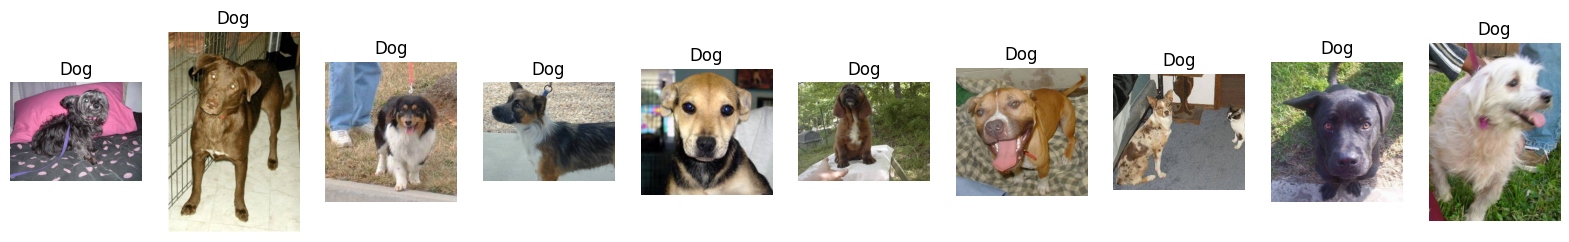

In [4]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

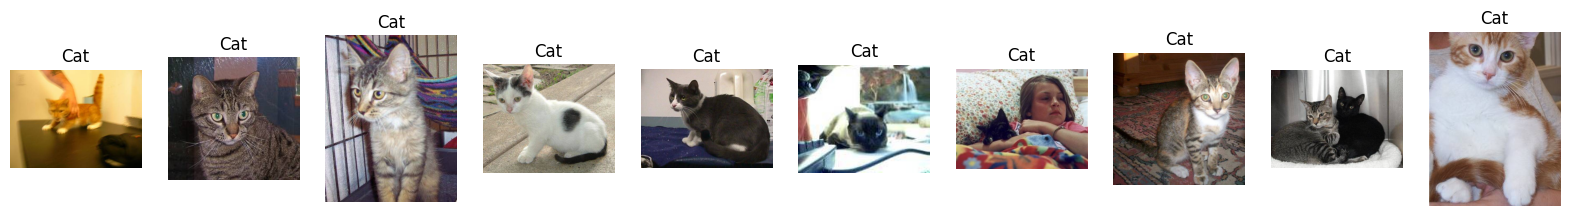

In [5]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

Images are of varying size.

Every time the cell is run different set of images will be displayed, one can scan the images of both categories. Presence of humans in some images could be a challenge for the model to classify.

Some images have more than one cats or dogs respectively.

<a id='5'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

<a id='6'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Train Test Split </h3> </div>

In [6]:
labels = data['label']
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 23)

label_test_val = X_temp['label']
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 23)

Let's view the number of labels in X_train, X_val, X_test.

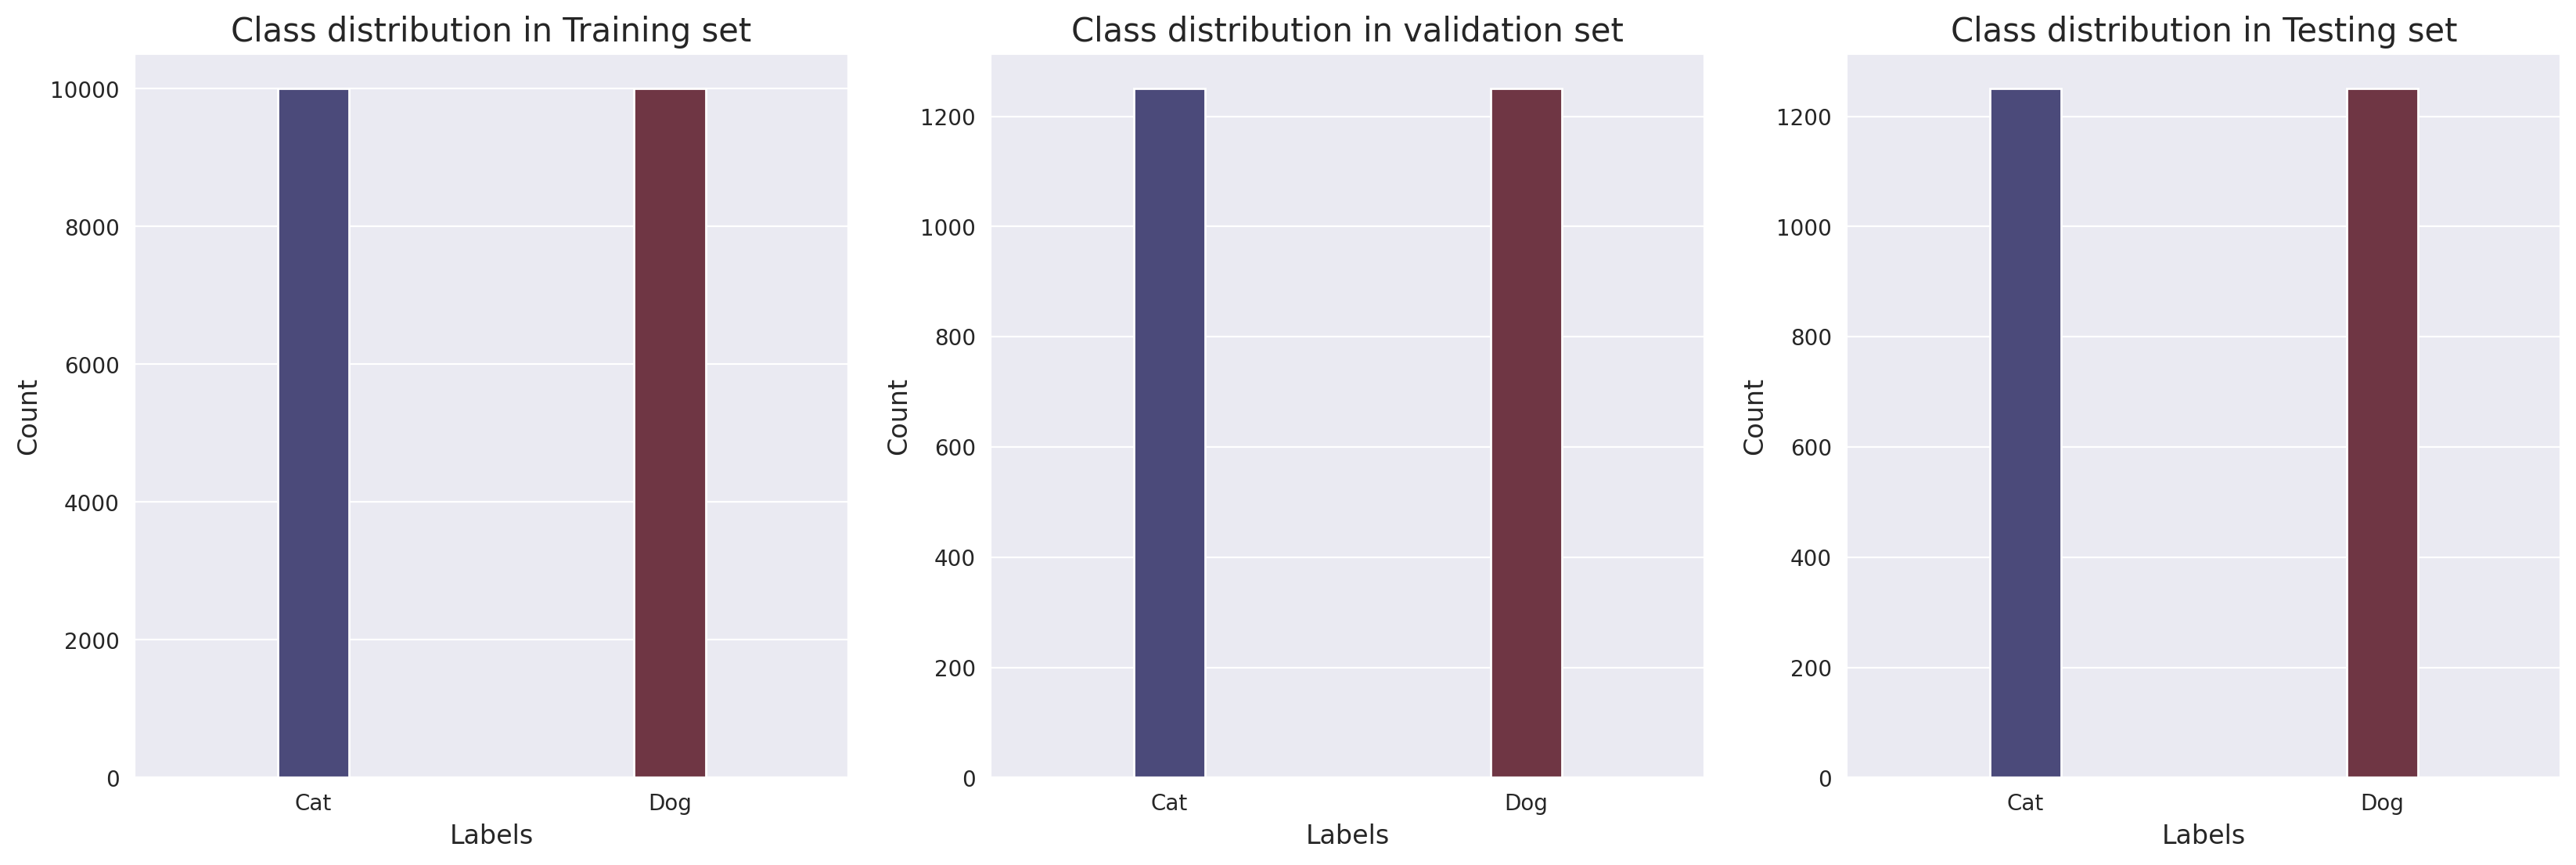

In [7]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

<a id='7'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Image Median </h3> </div>
Find median size of image for model building

In [8]:
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]

image_width = []
image_height = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    image_width.append(width)
    image_height.append(height)

median_width = np.median(image_width)
median_height = np.median(image_height)


print('median_size:', median_width,  'X', median_height)

median_size: 447.0 X 374.0


<a id='8'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Image Data Generator </h3> </div>

* we will be using vgg16 preprocess_input for image data genrator.
* The data for will used by flow_from_dataframe.
* The batch size is 64 and the image size is (370,370).


In [9]:
batch_size = 64
size = (370, 370)

# Create image data generator
idg = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

train_idg = idg.flow_from_dataframe(X_train, "train/", x_col= "filename", y_col= "label",
                                    batch_size = batch_size,
                                    target_size=size)

val_idg = idg.flow_from_dataframe(X_val, "train/", x_col="filename", y_col="label",
                                  batch_size = batch_size,
                                  target_size = size, shuffle = False)

test_idg = idg.flow_from_dataframe(X_test, "train/", x_col= "filename", y_col= "label",
                                    batch_size = batch_size,
                                    target_size=size, shuffle = False)

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


<a id='9'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>

<a id='10'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Pre-trained Base Model </h3> </div>
Download vgg16 model and freeze the weights.

* By setting layer.trainable = False, freezing the weights of all the layers in the VGG16 model.The vgg16 derived weights will not be trained during the training of final model.

In [10]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(370, 370, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


<a id='11'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Final Model </h3> </div>
Define functional model

In [11]:
flat = tf.keras.layers.Flatten() (vgg16_model.output)
dropout1 = tf.keras.layers.Dropout(0.2, name="Dropout1") (flat)
dense1 = tf.keras.layers.Dense(128, activation="relu") (dropout1)
dropout2 = tf.keras.layers.Dropout(0.2, name="Dropout2")(dense1)
output = tf.keras.layers.Dense(2, activation="softmax") (dropout2)

final_model = tf.keras.models.Model(inputs=[vgg16_model.input], outputs=[output])

<a id='12'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Compile the model </h3> </div>
Finally we will compile the model .There are 3 things to mention here : Optimizer,Loss, Metrics

* **Optimizer** :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam.

* **Loss** :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy.

* **Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [12]:
final_model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics = ["acc"])

<a id='13'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Callbacks </h3> </div>
we will be using two callbacks -

* **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.
* **EarlyStopping :** Stop training when a monitored metric has stopped improving.

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience=2,
                                            factor=0.5, min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss', patience=5,
                              restore_best_weights=True, verbose=0)

<a id='14'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Fit the model </h3> </div>

We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.The model will be fit for 30 epochs.

In [14]:
history = final_model.fit(train_idg, 
                          batch_size=batch_size, 
                          validation_data=val_idg, 
                          epochs = 20, 
                          callbacks=[learning_rate_reduction,early_stoping])

Epoch 1/20
313/313 [==============================] - 322s 939ms/step - loss: 0.6436 - acc: 0.9578 - val_loss: 0.0467 - val_acc: 0.9804 - lr: 0.0010
Epoch 2/20
313/313 [==============================] - 283s 904ms/step - loss: 0.0535 - acc: 0.9836 - val_loss: 0.0320 - val_acc: 0.9868 - lr: 0.0010
Epoch 3/20
313/313 [==============================] - 283s 903ms/step - loss: 0.0240 - acc: 0.9895 - val_loss: 0.0494 - val_acc: 0.9852 - lr: 0.0010
Epoch 4/20
313/313 [==============================] - 283s 904ms/step - loss: 0.0198 - acc: 0.9917 - val_loss: 0.0548 - val_acc: 0.9816 - lr: 0.0010
Epoch 5/20
313/313 [==============================] - 283s 902ms/step - loss: 0.0158 - acc: 0.9926 - val_loss: 0.0530 - val_acc: 0.9828 - lr: 0.0010
Epoch 6/20
313/313 [==============================] - 282s 901ms/step - loss: 0.0195 - acc: 0.9916 - val_loss: 0.0645 - val_acc: 0.9848 - lr: 0.0010
Epoch 7/20
313/313 [==============================] - 282s 901ms/step - loss: 0.0172 - acc: 0.9937 - val_l

<a id='15'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot the results </h3> </div>

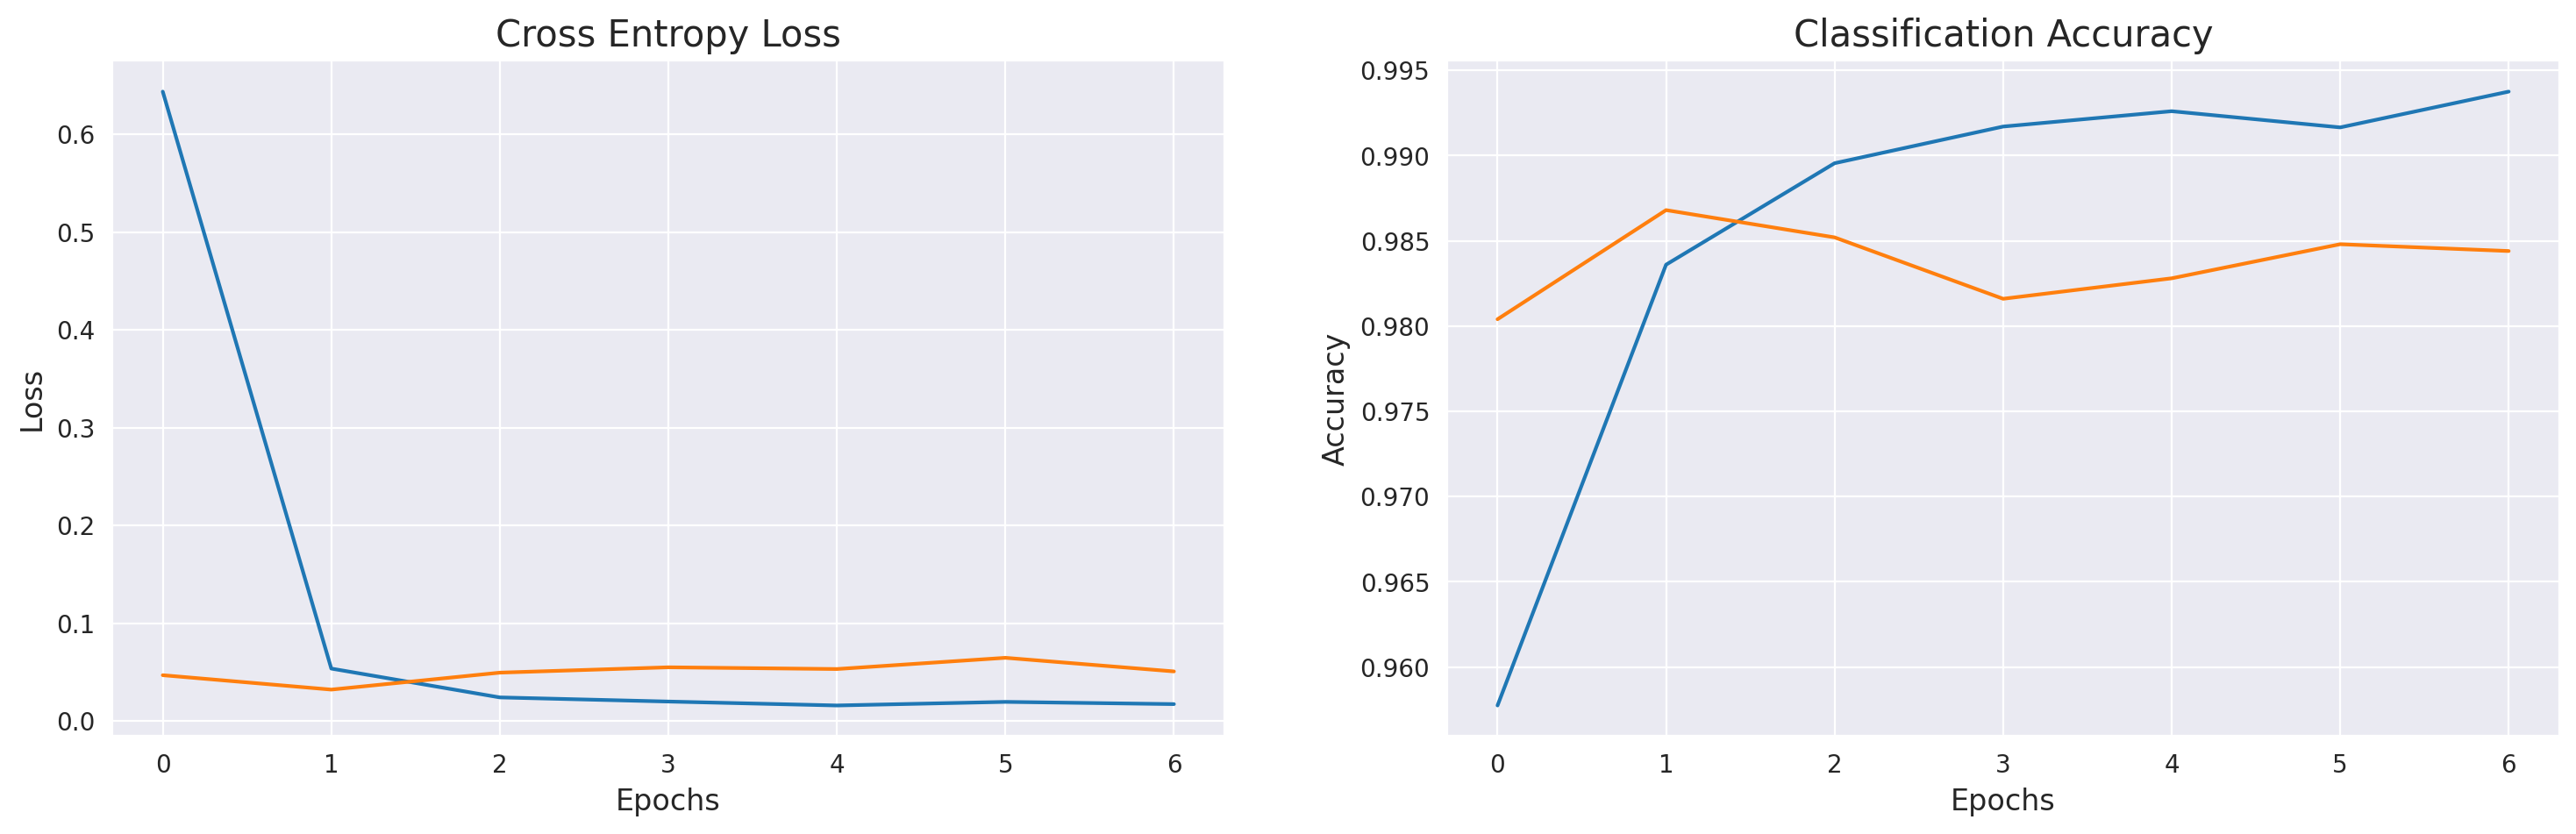

In [15]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['acc'])
plt.plot(error['val_acc'])

plt.show()

<a id='16'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Evaluvation </h3> </div>


Training and validation data accuracy and loss.

In [16]:
# Evaluvate
loss3,acc3 = final_model.evaluate(train_idg,batch_size = batch_size, verbose = 0)

print('The accuracy of the model for training data is:',acc3*100)
print('The Loss of the model for training data is:',loss3)

The accuracy of the model for training data is: 99.57000017166138
The Loss of the model for training data is: 0.014342674054205418


In [17]:
# Evaluvate
loss3,acc3 = final_model.evaluate(val_idg,batch_size = batch_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc3*100)
print('The Loss of the model for validation data is:',loss3)

The accuracy of the model for validation data is: 98.68000149726868
The Loss of the model for validation data is: 0.032022930681705475


<a id='17'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Prediction </h2> </div>

Now, we will predict the model on test dataset. 

In [18]:
# Prediction
result = final_model.predict(test_idg)

result_argmax = np.argmax(result, axis=1)

y_true = test_idg.labels

y_pred = result_argmax

# Evaluvate
loss3,acc3 = final_model.evaluate(test_idg,batch_size = batch_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc3*100)
print('The Loss of the model for testing data is:',loss3)

40/40 [==============================] - 32s 798ms/step
The accuracy of the model for testing data is: 97.9200005531311
The Loss of the model for testing data is: 0.06246335431933403


Classification Report

In [19]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.98      0.97      0.98      1250
         Dog       0.97      0.98      0.98      1250

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



Vgg16 rocks! 98% accuracy in our test subset that we split from training data.

Confusion Matrix

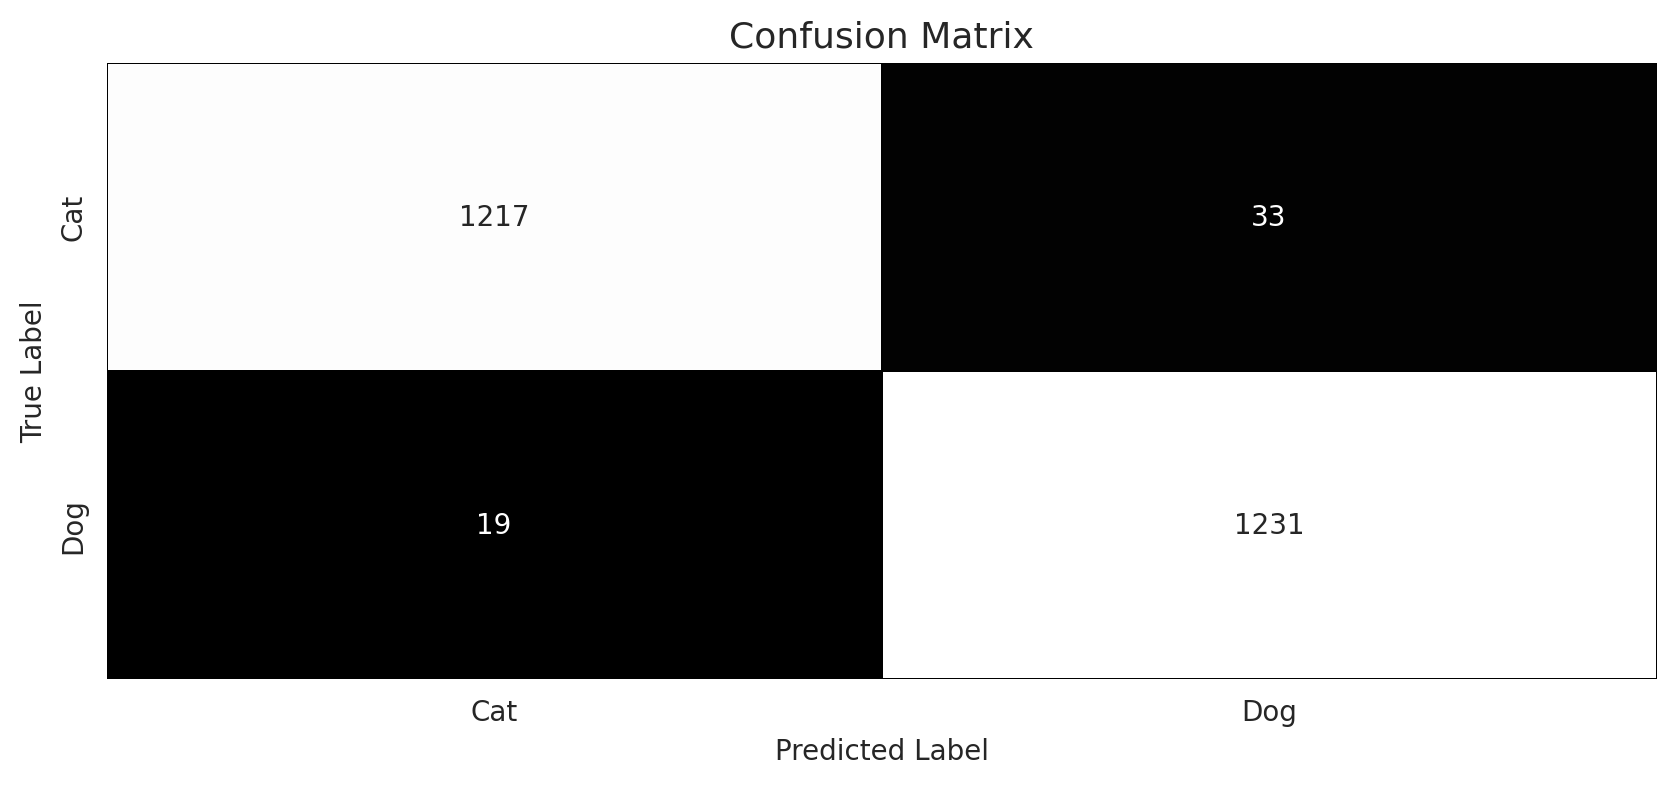

In [20]:
confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (10,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False,xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)
plt.show()

<a id='18'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> submission </h2> </div>
Make predictions on kaggle test data for submission.

In [21]:
# loading into dataframe
test_dir = "../working/test1/"
filenames = os.listdir(test_dir)
test_data = pd.DataFrame({"filename": filenames})
test_data['label'] = 'unknown'

# Create data genenerator for test data
test1_idg =  idg.flow_from_dataframe(test_data, 
                                     "test1/", 
                                     x_col= "filename",
                                     y_col = 'label',
                                     batch_size = batch_size,
                                     target_size=size, 
                                     shuffle = False)

# Test Prediction
test1_predict = final_model.predict(test1_idg)

test1_predict_argmax = np.argmax(test1_predict, axis=1)

y_test_pred = test1_predict_argmax

test_data['label'] = y_test_pred

# mapping
label_mapping = {0: 'cat', 1: 'dog'}
test_data['label'] = test_data['label'].map(label_mapping)
test_data.head()

Found 12500 validated image filenames belonging to 1 classes.
196/196 [==============================] - 164s 840ms/step


,filename,label
0,6525.jpg,dog
1,1422.jpg,cat
2,646.jpg,cat
3,11180.jpg,dog
4,7538.jpg,dog


<a id='19'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Visualize Classified Images  </h3> </div>

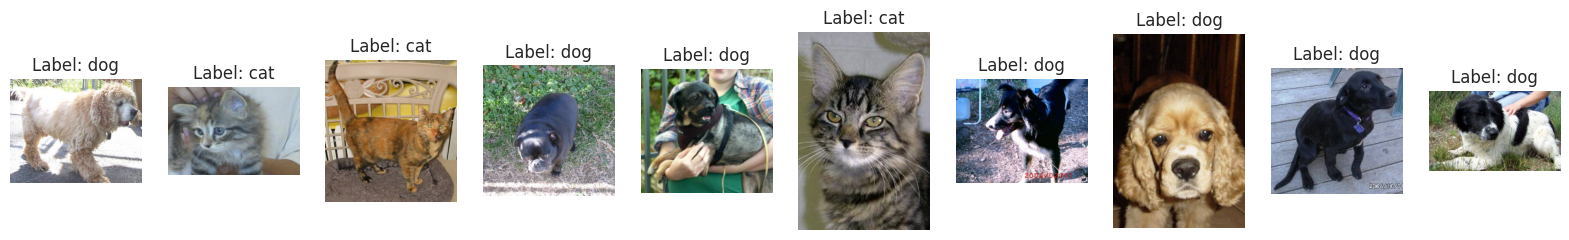

In [22]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for idx in range(10):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()

<a id='20'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Conclusion </h2> </div>

Using a pretrained model for Keras, VGG16, with a Dense model with softmax activation added on top and training with a reduced set of we were able to obtain quite good model in terms of validation accuracy.

The model was used to predict the classes of the images from the independent test set and results were submitted to test the accuracy of the prediction with fresh data.